# Logistic Regression

Data Processing

In [ ]:
import pandas as pd

In [ ]:
link = 'https://courses.openedu.ru/assets/courseware/v1/a11f0b9cb0074fdacc112eee71eb0b67/asset-v1:ITMOUniversity+DATANTECH2035+cifru_2035+type@asset+block/candy-data.csv'

In [ ]:
# Reading data with unique candy names as index
DATA = pd.read_csv(link, delimiter=',', index_col='competitorname')

In [ ]:
# Training the model will be done on data excluding certain candies
train_data = DATA.drop(['100 Grand','3 Musketeers','One dime','One quarter','Air Heads'])

In [ ]:
train_data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,1
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,1
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0
Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681,0


In [ ]:
# Selecting predictor data, removing last two columns, index not automatically included in data
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [ ]:
# Selecting the target/response column
y = pd.DataFrame(train_data['Y'])

In [ ]:
y.head()

,Y
competitorname,
Almond Joy,1
Baby Ruth,1
Boston Baked Beans,0
Candy Corn,0
Caramel Apple Pops,0


Training the logistic regression model

In [ ]:
# Import logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
y.values.ravel()

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
# Train the model
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Model parameters

$\mathrm{P}_{+}=\mathrm{P}_{+}\left(X_{1}, X_{2}, \ldots, X_{p}\right)=\frac{1}{1+e^{-\left(\theta_{0}+\theta_{1} X_{1}+\theta_{2} X_{2}+\ldots+\theta_{p} X_{p}\right)}}$

In [ ]:
reg.coef_

array([[ 1.69587937,  0.2542081 ,  0.64249035,  0.76435195, -0.47815478,
         0.53561838, -1.02132612,  0.34222469,  0.02155349,  0.32391966,
        -0.111942  ]])

In [ ]:
reg.intercept_

array([-0.98071842])

In [ ]:
reg.classes_

array([0, 1])

Предсказание результатов с помощью обученной модели

In [ ]:
# Prediction for manually entered candy, probabilities shown for classes 0 and 1 respectively
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.16929823, 0.83070177]])

In [ ]:
# Prediction for candy from the table
# Select a row from the table
AirHeads = DATA.loc[['Air Heads']]
# Select predictor data and make prediction
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0])

In [ ]:
reg.predict_proba(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([[0.62016331, 0.37983669]])

Model evaluation using test data

In [ ]:
link2 = 'https://cdn.openedu.ru/ESZCBLZ/courseware/v1/d53b0f8b959d03cc84a992f6070cabc6/asset-v1:ITMOUniversity+DATANTECH2035+cifru_2035+type@asset+block/candy-test.csv'

In [ ]:
# Read test data and select predictors
test_data = pd.read_csv(link2, delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [ ]:
X_test.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.7670
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.3250
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.1160
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.7550
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.5654


In [ ]:
# Make predictions using trained model
Y_pred = reg.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Class probabilities (0 and 1) for test data objects
Y_pred_probs = reg.predict_proba(X_test)

In [ ]:
Y_pred_probs

array([[0.72311341, 0.27688659],
       [0.66492117, 0.33507883],
       [0.66530382, 0.33469618],
       [0.64424243, 0.35575757],
       [0.2817487 , 0.7182513 ],
       [0.3187884 , 0.6812116 ],
       [0.31177263, 0.68822737],
       [0.236561  , 0.763439  ],
       [0.65296892, 0.34703108],
       [0.64227911, 0.35772089],
       [0.66110745, 0.33889255],
       [0.84950158, 0.15049842],
       [0.65443869, 0.34556131],
       [0.40934211, 0.59065789],
       [0.28409362, 0.71590638]])

In [ ]:
# Select probabilities for class 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [ ]:
Y_pred_probs_class_1

array([0.27688659, 0.33507883, 0.33469618, 0.35575757, 0.7182513 ,
       0.6812116 , 0.68822737, 0.763439  , 0.34703108, 0.35772089,
       0.33889255, 0.15049842, 0.34556131, 0.59065789, 0.71590638])

In [ ]:
# Select target Y from test data and convert to array
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [ ]:
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
# Import metrics library
from sklearn import metrics

In [ ]:
# Calculate AUC (Area Under Curve)
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [ ]:
# Calculate Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [ ]:
# Calculate Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Plot ROC curve

In [ ]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred_probs_class_1)

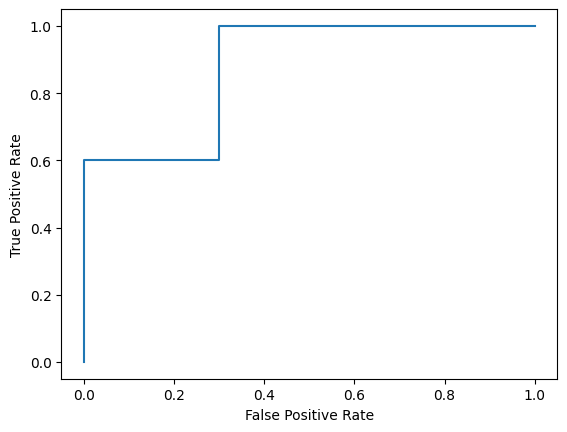

In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = round(metrics.roc_auc_score(Y_true, Y_pred_probs_class_1), 3)

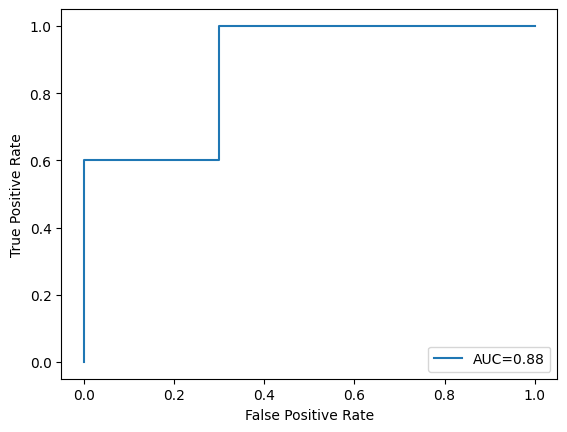

In [ ]:
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()